In [1]:
import csv
import numpy as np
import pandas as pd
import tensorflow as tf
import matplotlib.pyplot as plt
import matplotlib.style as style
from inspect import signature
from sklearn.utils import shuffle
from sklearn.metrics import roc_curve
from sklearn.metrics import roc_auc_score
from sklearn.metrics import confusion_matrix
from sklearn.preprocessing import StandardScaler
from sklearn.metrics import precision_recall_curve
from sklearn.metrics import average_precision_score
from sklearn.model_selection import train_test_split

In [2]:
style.use('seaborn-poster')
style.use('seaborn-whitegrid')

In [3]:
# set random seed for random number generator
np.random.seed(30)

In [4]:
# read the data from the excel sheet into a dataframe
dataset = pd.read_excel('Pubchem.xlsx')
# dataset = pd.read_excel('MACCS.xlsx')

In [5]:
# number of features as input dimension
input_dim = dataset.shape[1]-2

In [6]:
# input matrix to neural network of size (no. of training data X no. of features)
X = np.asarray(dataset[dataset.columns[1:(dataset.shape[1]-1)]])

# true output labels
Y = np.asarray(dataset['IC50'])
Y = (Y < 100000)
Y = Y.astype(int)

# shuffle and reshape the data 
Z = np.zeros((X.shape[0],X.shape[1]+1))
Z[:,:-1] = X
Z[:,-1] = Y
Z = shuffle(Z)
X = Z[:,:-1]
Y = Z[:,-1]
Y = Y.reshape(dataset.shape[0],1)

In [7]:
# split the data into training and test set
X_train, X_test, y_train, y_test = train_test_split(X, Y, test_size = 0.25)

# normalize and scale both training and test inputs
sc = StandardScaler()
sc.fit(X_train)
X_train = sc.transform(X_train)
sc.fit(X_test)
X_test = sc.transform(X_test)

In [8]:
# sequential neural network model
model = tf.keras.models.Sequential()
model.add(tf.keras.layers.Dense(882, input_dim=input_dim, activation='relu', kernel_regularizer=tf.keras.regularizers.l2(0.001)))
model.add(tf.keras.layers.Dense(5, activation='relu', kernel_regularizer=tf.keras.regularizers.l2(0.001)))
model.add(tf.keras.layers.Dense(1, activation='sigmoid'))
model.compile(loss='binary_crossentropy', optimizer='adam', metrics=['accuracy'])
model.fit(X_train, y_train, epochs = 85)

Epoch 1/85
6525/6525 [==============================] - 2s 335us/sample - loss: 0.4997 - accuracy: 0.9661
Epoch 2/85
6525/6525 [==============================] - 2s 297us/sample - loss: 0.2126 - accuracy: 0.9854
Epoch 3/85
6525/6525 [==============================] - 2s 300us/sample - loss: 0.1306 - accuracy: 0.9876
Epoch 4/85
6525/6525 [==============================] - 2s 307us/sample - loss: 0.1083 - accuracy: 0.9864
Epoch 5/85
6525/6525 [==============================] - 2s 297us/sample - loss: 0.0891 - accuracy: 0.9900
Epoch 6/85
6525/6525 [==============================] - 2s 304us/sample - loss: 0.0906 - accuracy: 0.9873
Epoch 7/85
6525/6525 [==============================] - 2s 303us/sample - loss: 0.0857 - accuracy: 0.9874
Epoch 8/85
6525/6525 [==============================] - 2s 303us/sample - loss: 0.0623 - accuracy: 0.9926
Epoch 9/85
6525/6525 [==============================] - 2s 381us/sample - loss: 0.0744 - accuracy: 0.9896
Epoch 10/85
6525/6525 [=======================

6525/6525 [==============================] - 2s 286us/sample - loss: 0.0329 - accuracy: 0.9948
Epoch 78/85
6525/6525 [==============================] - 2s 284us/sample - loss: 0.0357 - accuracy: 0.9934
Epoch 79/85
6525/6525 [==============================] - 2s 283us/sample - loss: 0.0273 - accuracy: 0.9962
Epoch 80/85
6525/6525 [==============================] - 2s 285us/sample - loss: 0.0224 - accuracy: 0.9975
Epoch 81/85
6525/6525 [==============================] - 2s 284us/sample - loss: 0.0227 - accuracy: 0.9972
Epoch 82/85
6525/6525 [==============================] - 2s 283us/sample - loss: 0.0226 - accuracy: 0.9975
Epoch 83/85
6525/6525 [==============================] - 2s 284us/sample - loss: 0.0177 - accuracy: 0.9991
Epoch 84/85
6525/6525 [==============================] - 2s 285us/sample - loss: 0.0176 - accuracy: 0.9983
Epoch 85/85
6525/6525 [==============================] - 2s 283us/sample - loss: 0.0180 - accuracy: 0.9982


In [9]:
# validate the model using test data 
y_pred = model.predict(X_test)
y_pred = (y_pred > 0.5)

# compare the model predictions with true output labels using confusion matrix
cm = confusion_matrix(y_test, y_pred)
print( 'True negatives: ' + str(cm[0][0]))
print( 'False postives: ' + str(cm[0][1]))
print( 'False negatives: ' + str(cm[1][0]))
print( 'True positives: ' + str(cm[1][1]))

True negatives: 1523
False postives: 9
False negatives: 11
True positives: 633


In [10]:
# evaluate the model on training data
scores = model.evaluate(X_train, y_train)
print("\n%s: %.2f%%" % (model.metrics_names[1], scores[1]*100))

# evaluate the model on test data
scores = model.evaluate(X_test, y_test)
print("\n%s: %.2f%%" % (model.metrics_names[1], scores[1]*100))

6525/6525 [==============================] - 1s 127us/sample - loss: 0.0218 - accuracy: 0.9963

accuracy: 99.63%
2176/2176 [==============================] - 0s 125us/sample - loss: 0.0461 - accuracy: 0.9908

accuracy: 99.08%


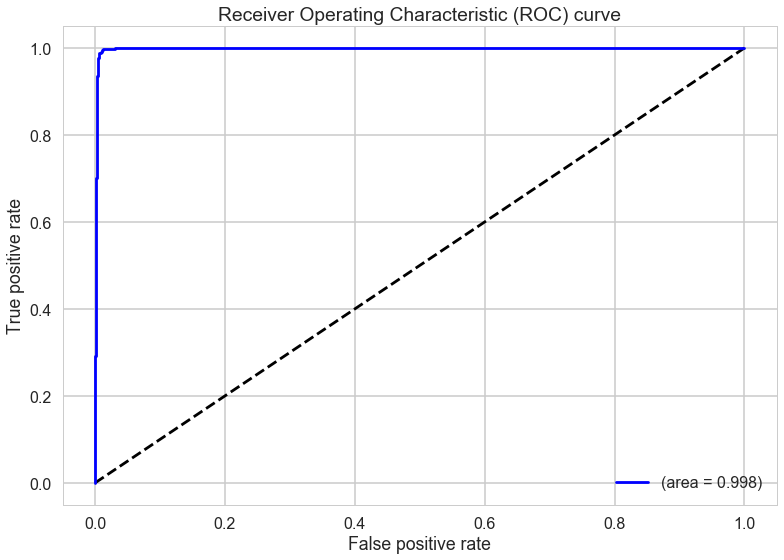

In [11]:
# plot roc curve
y_pred= model.predict(X_test).ravel()
fpr, tpr, thresholds = roc_curve(y_test, y_pred)
auc = roc_auc_score(y_test, y_pred)
plt.figure(1)
plt.plot([0, 1], [0, 1], 'k--')
plt.plot(fpr, tpr, 'b-' ,label='(area = {:.3f})'.format(auc))
plt.xlabel('False positive rate')
plt.ylabel('True positive rate')
plt.title('Receiver Operating Characteristic (ROC) curve')
plt.legend(loc='best')
# plt.savefig('fig-c1.png')

Average precision-recall score: 0.99


Text(0.5, 1.0, 'Precision Recall Curve (PRC)')

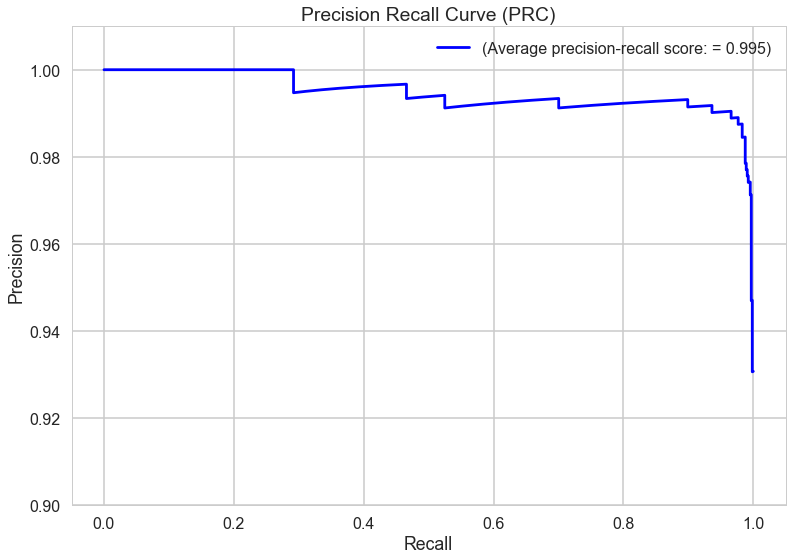

In [12]:
# plot prc curve
average_precision = average_precision_score(y_test, y_pred)
print('Average precision-recall score: {0:0.2f}'.format(average_precision))
precision, recall, _ = precision_recall_curve(y_test, y_pred)
plt.plot([0, 1], [0.5, 0.5], 'k--')
plt.ylim(0.9,1.01)
plt.plot(recall, precision, 'b-', label='(Average precision-recall score: = {:.3f})'.format(average_precision))
plt.legend(loc='best')
plt.xlabel('Recall')
plt.ylabel('Precision')
plt.title('Precision Recall Curve (PRC)')
# plt.savefig('fig-c2.png')

In [ ]:
# read the unknown data set from csv file to dataframe
udataset = pd.read_csv('Pubchem_Maybridge.csv')
# udataset = pd.read_csv('data/maybridge_descriptors/MACCS_maybridge.csv')

In [ ]:
# curate the unknown dataset to remove duplicates
cudataset = udataset
d =[]
for i in range(udataset.shape[0]-1):
    if udataset.loc[i]['Name']==udataset.loc[i+1]['Name']:
        d.append(i+1)
cudataset = udataset.drop(udataset.index[d])
print(cudataset.shape)

In [ ]:
# format the unknown dataset to numpy array to give it as input to neural network model
uX = np.asarray(cudataset[cudataset.columns[1:(cudataset.shape[1])]])

# normalize and scale the unknown input matrix to be screened
sc.fit(uX)
uX = sc.transform(uX)

# screen the unknown data using neural network model
uY = model.predict(uX)

# convert the model outputs to true/false (or) active/inactive (or) 1/0
uYc = (uY > 0.5)

# count the number of actives/true's/1's 
hits = np.sum(uYc)
print(hits)

In [ ]:
# NaN output found and removed
np.argwhere(np.isnan(uY)>0)[0]
uY[24124] = 0

In [ ]:
# store the names of the actives screened using the neural network model in a list
idx = np.nonzero(uY > 0.5)[0]
d =[]
for i in list(idx):
    d.append(udataset.iloc[i]['Name'])

# save the list of names into a csv file
with open("output_hits_7196.csv", "w") as outfile:
    for entries in d:
        outfile.write(entries)
        outfile.write("\n")